## Keras Layered Model & Explorations - JoanieW

Based on the following tutorial: https://elix-tech.github.io/ja/2016/06/02/kaggle-facial-keypoints-ja.html#conv

And modeled after Jackie's code structure for Lenet5

### Model Description
- Convolutional NN with 3 convolutional layers and 2 fully connected layers
- Performed maximum pooling of 2x2 after each convolutional layer
- ‘Relu’ activation function
- One approach added BatchNormalization layers
- Default Keras Conv2D use_bias = True
- Adam optimizer - stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments and recommended for CNN. Did not try SGD due to readings online indicating better success with Adam


### Best Score on Base Model

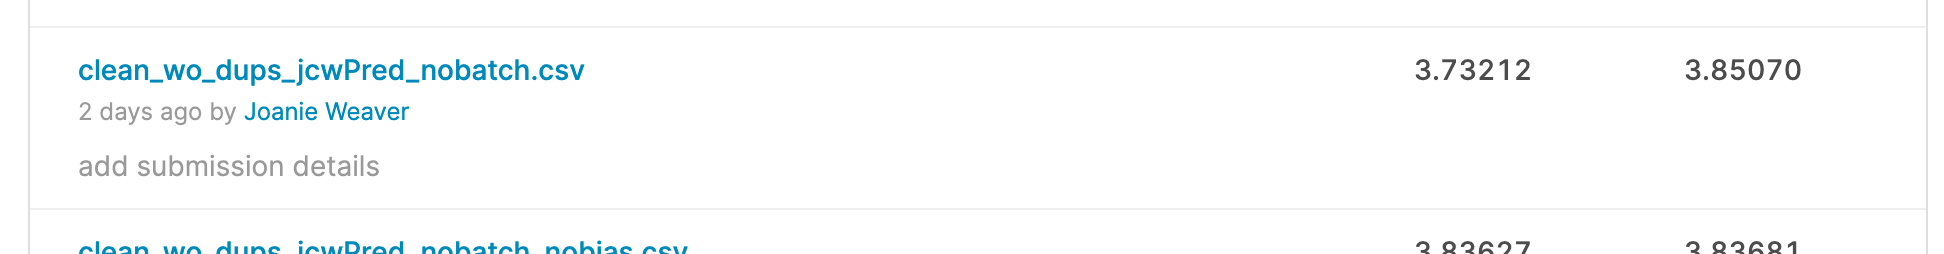

The best score for the base version of this model is above. The base version predicted 30 keypoints. This base version was run on all 7 of our clean files but the best results were using the file that did not include duplicates, worst outliers, or overlap outliers.

## Generating the Models and the Predictions

The following code blocks were used to setup the code, create models, and then create predictions.

### Setup Code

In [7]:
#Set the utils path to point to the utils directory locally
UTILS_PATH = "utils/"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
from transform_data import TransformData
import imp
import pickle
import numpy as np
import pandas as pd
from keras.models import Sequential, Model, model_from_json

In [9]:
cd ..

/Users/joanieweaver/Desktop/intro_ml/blackboxes


In [11]:
### this is gold right here.
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models/", file_path)

#Adding a transform data object if I want to do any transformations in this file
transformdata = TransformData()
trainer.print_paths()

Model dir: data/models/


### For every version of a clean Train file in a given path, create and save a model

The following cell is used to load each clean train file and build a model with it.

This cell was modified if I wanted to try different transformations on the data. See commented sections in the cell below.

Note: This cell can be used for the 8 or 30 model.

If used for the 8 model:
- the train_model should take the parameter separate = True
- the data passed in should only have 8 keypoint columns so you must filter to only the 8 columns specified in the commented area below

If used for the 30 model:
- the train_model should take the parameter separate = False or take no parameter as the default is False
- the data passed in should have all 30 keypoint columns

Opening file:  clean_w_dups.p
cleantrain/clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 8628
Number of images to be dimmed: 8628
Completed brighten and dim. Number of observations added to train: 17256
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)    

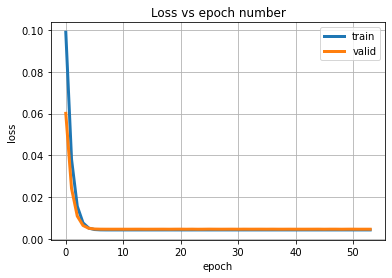

clean_w_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
cleantrain/clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 9181
Number of images to be dimmed: 9181
Completed brighten and dim. Number of observations added to train: 18362
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0

214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0480 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0498 - val_mse: 0.0047

Epoch 00059: val_mae did not improve from 0.04961
Epoch 60/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00060: val_mae did not improve from 0.04961
Epoch 61/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0480 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00061: val_mae did not improve from 0.04961
Epoch 62/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0498 - val_mse: 0.0047

Epoch 00062: val_mae did not improve from 0.04961
Epoch 63/300
214/214 [==============================] - 2s 12ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae:

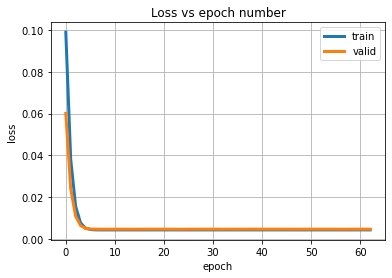

clean_w_outliers_jcw model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
cleantrain/clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 8623
Number of images to be dimmed: 8623
Completed brighten and dim. Number of observations added to train: 17246
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0        

214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00022: val_mae improved from 0.04967 to 0.04967, saving model to data/models/clean_o_dups_jcw.h5
Epoch 23/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0499 - val_mse: 0.0047

Epoch 00023: val_mae did not improve from 0.04967
Epoch 24/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0496 - val_mse: 0.0047

Epoch 00024: val_mae improved from 0.04967 to 0.04960, saving model to data/models/clean_o_dups_jcw.h5
Epoch 25/300
214/214 [==============================] - 2s 10ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00025: val_mae did not improve from 0.04960
Epoch 26/300
214/214 [=============

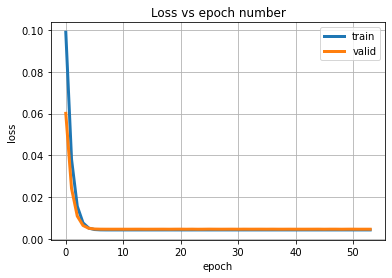

clean_o_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
cleantrain/clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 8618
Number of images to be dimmed: 8618
Completed brighten and dim. Number of observations added to train: 17236
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         

214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00022: val_mae improved from 0.04967 to 0.04967, saving model to data/models/clean_wo_dups_jcw.h5
Epoch 23/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0499 - val_mse: 0.0047

Epoch 00023: val_mae did not improve from 0.04967
Epoch 24/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0496 - val_mse: 0.0047

Epoch 00024: val_mae improved from 0.04967 to 0.04960, saving model to data/models/clean_wo_dups_jcw.h5
Epoch 25/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00025: val_mae did not improve from 0.04960
Epoch 26/300
214/214 [===========

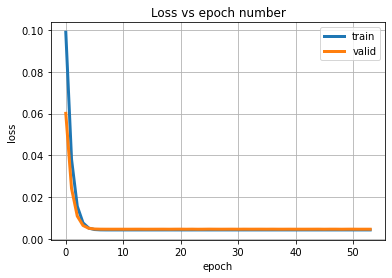

clean_wo_dups_jcw model created and file saved for future use.
End model and train

Opening file:  clean_all_outliers.p
cleantrain/clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 9181
Number of images to be dimmed: 9181
Completed brighten and dim. Number of observations added to train: 18362
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)  

214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0480 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00022: val_mae did not improve from 0.04968
Epoch 23/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0480 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00023: val_mae did not improve from 0.04968
Epoch 24/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0496 - val_mse: 0.0047

Epoch 00024: val_mae improved from 0.04968 to 0.04961, saving model to data/models/clean_all_outliers_jcw.h5
Epoch 25/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00025: val_mae did not improve from 0.04961
Epoch 26/300
214/214 [==============================] - 2s 11ms/step - loss: 0.004

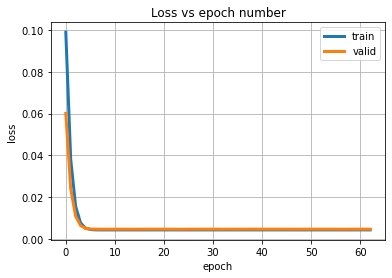

clean_all_outliers_jcw model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
cleantrain/clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 8634
Number of images to be dimmed: 8634
Completed brighten and dim. Number of observations added to train: 17268
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)   


Epoch 00021: val_mae did not improve from 0.04979
Epoch 22/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0480 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0498 - val_mse: 0.0047

Epoch 00022: val_mae improved from 0.04979 to 0.04979, saving model to data/models/clean_duplicates_jcw.h5
Epoch 23/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0480 - mse: 0.0044 - val_loss: 0.0048 - val_mae: 0.0500 - val_mse: 0.0048

Epoch 00023: val_mae did not improve from 0.04979
Epoch 24/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0484 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00024: val_mae improved from 0.04979 to 0.04972, saving model to data/models/clean_duplicates_jcw.h5
Epoch 25/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0499 - val_mse: 0.0047

Epoch 00025: 

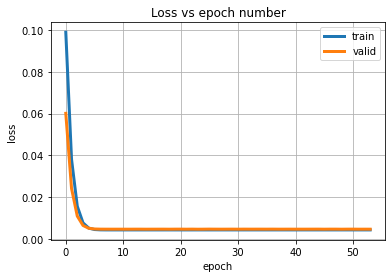

clean_duplicates_jcw model created and file saved for future use.
End model and train

Opening file:  clean_o_outliers.p
cleantrain/clean_o_outliers.p
Train Shape: (7020, 31)
Begin model and train:
Model name: clean_o_outliers_jcw
Scaling images
Scaling complete.
Number of images to be brightened: 9160
Number of images to be dimmed: 9160
Completed brighten and dim. Number of observations added to train: 18320
Begining the split of Train with all features
Looking for model JW
JW model file not found. Model creation beginning
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)     

214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0480 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0498 - val_mse: 0.0047

Epoch 00059: val_mae did not improve from 0.04961
Epoch 60/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0483 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00060: val_mae did not improve from 0.04961
Epoch 61/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0480 - mse: 0.0044 - val_loss: 0.0047 - val_mae: 0.0497 - val_mse: 0.0047

Epoch 00061: val_mae did not improve from 0.04961
Epoch 62/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0043 - mae: 0.0479 - mse: 0.0043 - val_loss: 0.0047 - val_mae: 0.0498 - val_mse: 0.0047

Epoch 00062: val_mae did not improve from 0.04961
Epoch 63/300
214/214 [==============================] - 2s 11ms/step - loss: 0.0044 - mae: 0.0481 - mse: 0.0044 - val_loss: 0.0047 - val_mae:

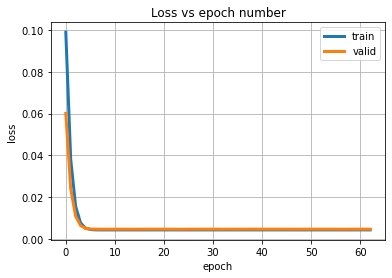

clean_o_outliers_jcw model created and file saved for future use.
End model and train



In [12]:

files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    print(clean_file)
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_jcw"))
    print("Model name:", model_name)
    
    #Optional transformations to run and reset train_data to
    flipped = transformdata.FlipHorizontal(train_data)
    train_data = pd.concat([train_data,flipped])
    #train_data = transformdata.Bright_Dim(train_data,level_to_dim= .01)
    
    #The following line is for 8 keypoint model
    #Comment/uncomment as necesssary
    #Filter out unnecessary columns for 8 keypoint model
#     train_data = train_data[["left_eye_center_x","left_eye_center_y","right_eye_center_x","right_eye_center_y",
#                              "nose_tip_x","nose_tip_y","mouth_center_bottom_lip_x","mouth_center_bottom_lip_y","image"]].copy()
    
    
    #Run with separate = True to train on 8 columns of data
    #If transformations were run above, train_data will be transformed
    model, history = trainer.train_model(model_name, train_data,verbose = True,separate=False)
    print("End model and train")    
    print()

### For every model file in a given path, predict using the model and save the predictions in CSV file

Note the code below can be used for an 8 or 30 keypoint model.

If used for an 8 keypoint model, change the columns parameter to False in the predict_standard function.
If used for a 30 keypoint model, change the columns parameter to True in the predict_standard function.

In [13]:
#Getting the prediction information from the id_lookup table and the test list of images
id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models/"
pred_path = "data/predictions/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        
        #Set columns = False if only predicting 8 keypoints
        Y= predictor.predict_standard(base_name, filename, model_json, test, columns="Full")
        print("End model and train")    
        print()


Model dir: data/models/
Prediction dir: data/predictions/
Working with:  clean_w_outliers_jcw
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_w_outliers_jcwPred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers_jcw
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_all_outliers_jcwPred.csv
Predictions written 
End model and train

Working with:  clean_w_dups_jcw
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions/clean_w_dups_jcwPred.csv
Predictions written 
End model and train

Working with:  clean_wo_d

## Other Approaches Beyond the Base Model

I tried a few other approaches beyond the base model I described above.

Approach 1: Adding BatchNormalization layers to my model. This was done in my modelling code in train_jcw in the load_models.py
* This did appeared to make all of the result worse

Approach 2: Setting the use_bias parameter in Conv2D to False
*  There was some success with this but it didn't reach a new high score

Approach 3: Combining 1 & 2
* This made predictions worse

Approach 4: Appending flipped images to the data
* This appeared to make predictions better and received a new high score.

Approach 5: Brightening all the data
* This appeared to make predictions worse

Approach 6: Brightening the data with flipped data appended
* There was some success with this but it didn't reach a new high score

Approach 7:
* Appending the data with flipped images and brightened images

Approach 8:
* Run a model on data that has all 8 keypoints and output a model that only predicts 8 keypoints. Use this model to make predictions for all of the test cases that only require 8 keypoints and then fill in the missing data for the remaining test cases from a prior predictions file.

### Some best scores

The score below was generated using Approach 2, setting the bias to False. The new score of 3.8 is slightly worse than the prior best of 3.7.

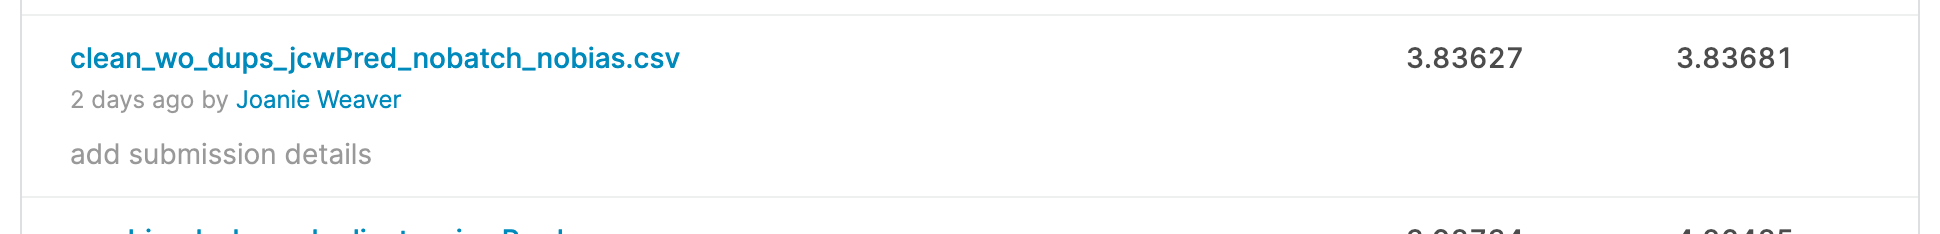

The score below was generated by appending the flipped image data to the data. It had no BatchNormalization layers and bias was set to True. This new score of 3.6 is better than the prior high score of 3.7.

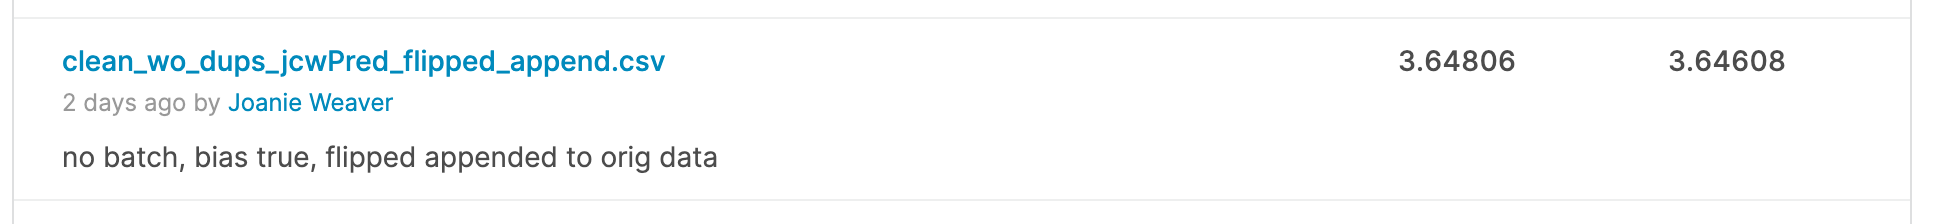

The score below was generated by appending flipped and brightened images to the training data before running the model.

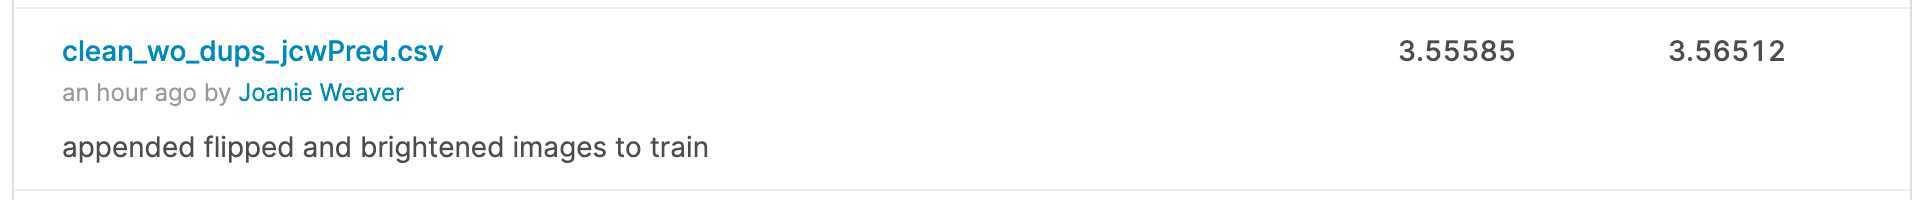

## Approach 8

Below are some explorations on using different models for 8 vs. 30 predictions

As we showed in the EDA, the majority of the test cases only require 8 keypoints to be predicted. Using the code at the end, I ran each of our group's 3 models with the last layer only predicting 8 keypoints instead of 30.

For the test cases that still needed 30, I took the predictions from an earlier predictions file for that corresponding model and clean training set.

The code immediately following was used for explorations to determine where/how to split the predictions for 8 vs. 30.

In [14]:
#Load the id_lookup and test

id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

In [15]:
#Filtering to ids where image_id count == 8
#These ids only require 8 keypoints
new_id = id_lookup.groupby("image_id").agg('count')
new_id_2 = new_id[new_id[ "row_id" ] <= 8]
new_id_1 = new_id[new_id[ "row_id" ] > 8]
print(new_id_2.index)
print(new_id_1.index)


UInt64Index([ 592,  593,  594,  595,  596,  597,  598,  599,  600,  601,
             ...
             1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783],
            dtype='uint64', name='image_id', length=1192)
UInt64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             582, 583, 584, 585, 586, 587, 588, 589, 590, 591],
            dtype='uint64', name='image_id', length=591)


In [16]:
#Separating into groups based on the index that separates 30 keypoints vs 8 keypoints
id_lookup_1 = id_lookup[id_lookup['image_id']<=591]
id_lookup_2 = id_lookup[id_lookup['image_id'] > 591]

In [17]:
test_1 = test[test['image_id']<=591]
test_1

,index,image_id,image,check_sum
0,0,1,"[182, 183, 182, 182, 180, 180, 176, 169, 156, ...",3891597135
1,1,2,"[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3...",3744521023
2,2,3,"[177, 176, 174, 170, 169, 169, 168, 166, 166, ...",1725430369
3,3,4,"[176, 174, 174, 175, 174, 174, 176, 176, 175, ...",1846516529
4,4,5,"[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3...",439894959
...,...,...,...,...
586,586,587,"[12, 12, 19, 20, 20, 23, 21, 16, 9, 15, 15, 9,...",2693544510
587,587,588,"[212, 201, 174, 108, 78, 65, 60, 56, 50, 43, 4...",1425702419
588,588,589,"[112, 115, 115, 117, 114, 115, 116, 118, 60, 2...",3237522221
589,589,590,"[4, 4, 4, 6, 6, 3, 3, 6, 5, 6, 4, 6, 10, 18, 2...",2101831858


In [18]:
test_2 = test[test['image_id']>591]
test_2

,index,image_id,image,check_sum
591,591,592,"[122, 117, 118, 118, 107, 74, 64, 62, 63, 61, ...",2955625664
592,592,593,"[65, 84, 67, 61, 79, 96, 72, 15, 24, 78, 30, 3...",3147100181
593,593,594,"[58, 66, 73, 56, 50, 47, 36, 33, 44, 37, 35, 4...",777778382
594,594,595,"[39, 26, 20, 23, 26, 30, 35, 38, 38, 31, 25, 1...",4192496760
595,595,596,"[146, 138, 124, 135, 150, 143, 139, 139, 141, ...",4143815008
...,...,...,...,...
1778,1778,1779,"[101, 101, 101, 100, 100, 97, 97, 98, 102, 149...",1245658012
1779,1779,1780,"[201, 191, 171, 158, 145, 140, 136, 130, 123, ...",32665744
1780,1780,1781,"[28, 28, 29, 30, 31, 32, 33, 34, 39, 44, 46, 4...",690063184
1781,1781,1782,"[104, 95, 71, 57, 46, 52, 65, 70, 70, 67, 76, ...",585356682


In [19]:
#Identify where in the id_lookup is the last output row
print(np.max(id_lookup_1['row_id']))
print(np.min(id_lookup_1['row_id']))

max_row_full = np.max(id_lookup_1['row_id'])

17592
1


The first 591 rows of the id lookups require more than 8 keypoints. Afterwards the next 1192 rows only require 6 or 8 keypoints.

## Reading in prediction csvs to combine to make final prediction file

The following code is used to read in the predictions that were made based on 8 keypoints and append information for test cases that required 30 keypoints from a previous prediction file.

To use this, make sure you've created predictions for an 8 keypoint model and 30 keypoint model already. Then,
- Update the predictions_separate parameter to point to where the 8 keypoint predictions are
- Update the predictions_full to point to where the 30 keypoint predictions are
- Your predictions will be saved to your current path with the prefix "combined_"

In [ ]:
file_path = "data/predictions/"
files = os.listdir(file_path)

for file in files:
    
    #separate is from the most recent run of predictions based solely on train data that had 8 keypoints
    #Update this path to your 8 keypoint directory
    predictions_separate= pd.read_csv("data/predictions/"+file)
    
    #full is the older predictions data that was built on all the train
    #Update this path to your 30 keypoint directory
    predictions_full = pd.read_csv("data/predictions_full/"+file)
    
    new_pred = predictions_separate[predictions_separate['RowId']>max_row_full].copy()
    new_pred = new_pred.append(predictions_full[predictions_full['RowId']<=max_row_full].copy())
    new_pred = new_pred.sort_values(by=['RowId'])
    
    #Update the path here if you don't want new predictions saving to current directory
    new_pred.to_csv("combined_"+file,index=False)
    

### Best Scores for Approach 8
The following top three scores were created using this combining method from models predictions 8 keypoints and 30 keypoints.

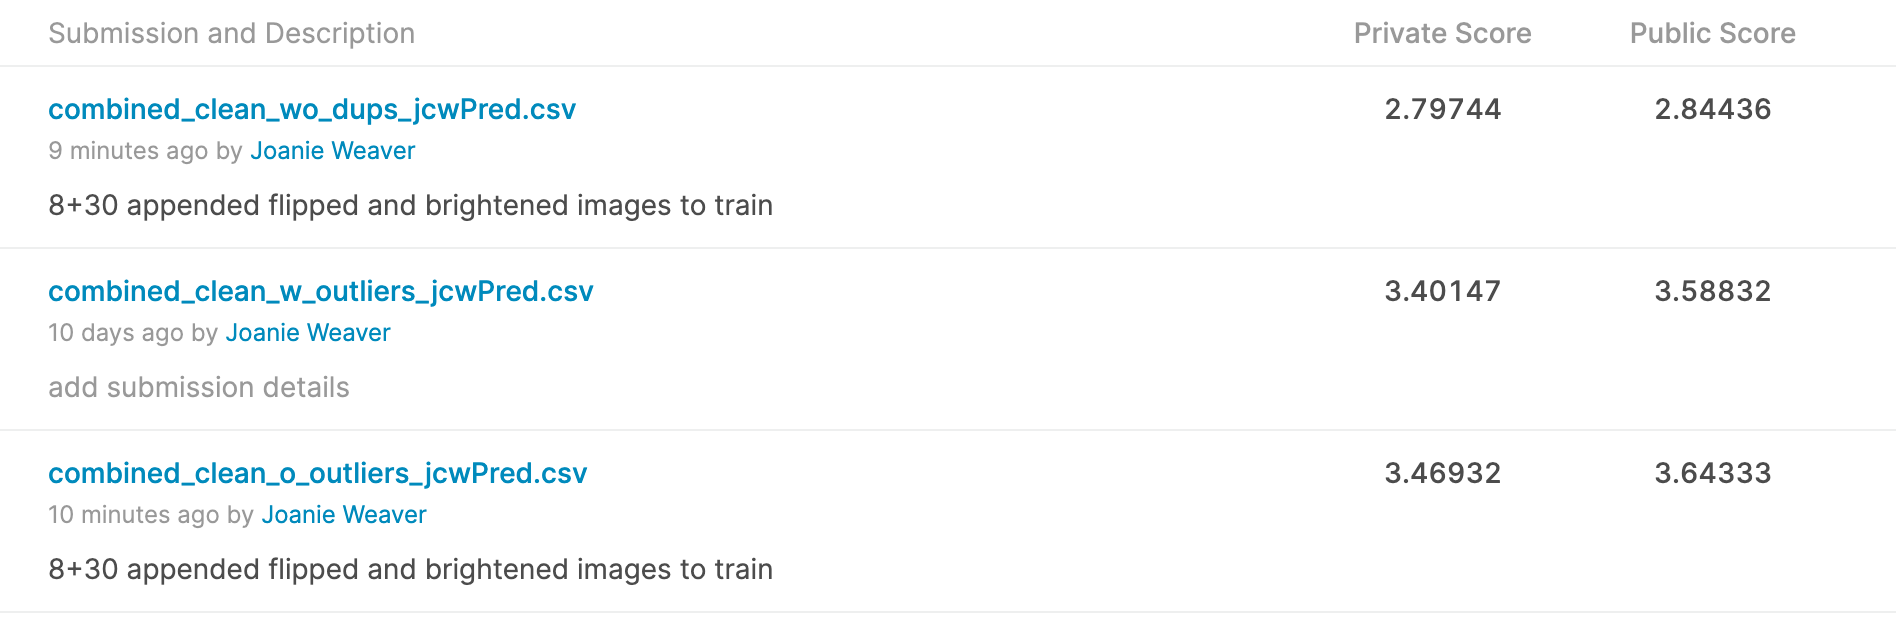